# EDA of IMDB Dataset from Huggingface datasets hub



Install the necessary libraries and load the dataset. We install the necessary libraries that we will use for performing exploratory data analysis on the IMDb dataset. The libraries include pandas, seaborn, matplotlib, datasets, nltk, and wordcloud.

In [12]:
!pip install pandas seaborn matplotlib datasets nltk wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load the IMDb dataset

We load the IMDb dataset from the Hugging Face datasets hub. The dataset contains movie reviews labeled as positive or negative.

In [25]:
import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

imdb = datasets.load_dataset('imdb')
train_df = pd.DataFrame(imdb['train'])
test_df = pd.DataFrame(imdb['test'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/3 [00:00<?, ?it/s]

## Data Profiling


We perform data profiling to get basic information about the dataset. First lets inspect the DataFrame to understand its structure. 



In [26]:
train_df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


We can see that our dataset consists of 2 features, "text" and "label"

Now let's take a look at the basic information about the dataset. This gives us an idea of the structure and size of the dataset.

In [27]:
display(train_df.info())
print("======================================")
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


None

It looks like that the dataset contains two splits, train and test, with 25,000 examples each. Each example consists of a text field and a label field. The text field contains a movie review, and the label field contains the sentiment of the review (either "positive" or "negative").

Next, let's check the distribution of the labels in the dataset.

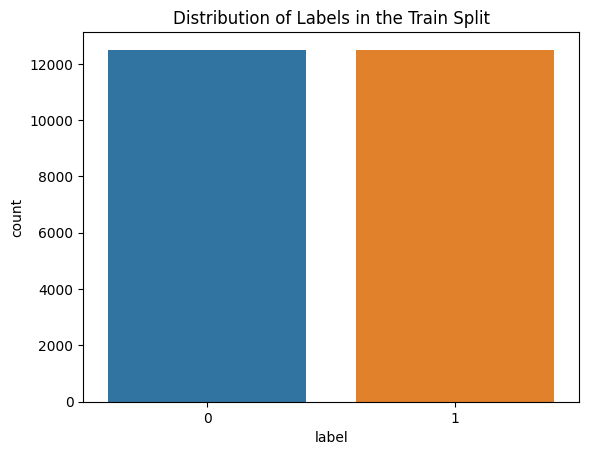

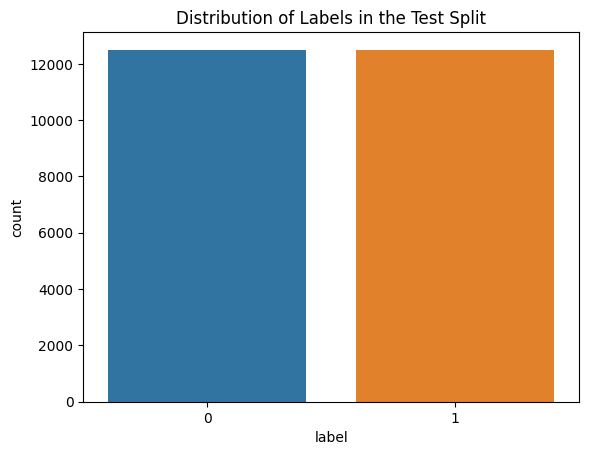

In [28]:
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Labels in the Train Split')
plt.show()

sns.countplot(data=test_df, x='label')
plt.title('Distribution of Labels in the Test Split')
plt.show()

From the plots, we can see that the dataset is balanced, with roughly equal numbers of positive and negative reviews.

Now lets take a look at the descriptive statistics. We print the descriptive statistics of the dataset, such as the mean, standard deviation, minimum, and maximum values of each column. Descriptive statistics give us an idea of the distribution of the data and can help us identify outliers or anomalies. 

In [29]:
print("===========================train==========================")
display(train_df.describe())
print("===========================test==========================")
display(test_df.describe())

===========================train==========================


,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


===========================test==========================


,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


Now lets display the number of missing values in each column and the number of unique values in each column. This gives us an idea of the quality and completeness of the data.

In [32]:
print("===========================train==========================")
display(train_df.isnull().sum())
print("===========================test==========================")
display(test_df.isnull().sum())

===========================train==========================


text     0
label    0
dtype: int64

===========================test==========================


text     0
label    0
dtype: int64

It looks like there are no missing values in the dataset, so we don't need to perform any cleaning.

Now lets check the number of unique values in each column. This will allow us to identify if there are any columns with a low number of unique values, which may indicate that the column is not useful for analysis.

In [35]:
print("===========================train==========================")
display(train_df.nunique())
print("===========================train==========================")
display(test_df.nunique())

===========================train==========================


text     24904
label        2
dtype: int64

===========================train==========================


text     24801
label        2
dtype: int64

Both traint and test set have the same number of unique values for text and labels. It looks like that they will be usefull for analysis.

## Data Cleaning

Now let's check for missing values in the dataset. 

Since there are no missing values in the dataset, we don't need to perform any cleaning for missing values.

We can clean the text data by removing stop words, special characters, and converting all text to lowercase. Stop words are common words that do not add meaning to a sentence, such as "the", "and", and "a". Removing stop words helps to reduce noise in the data and makes it easier to analyze the text data. We also remove special characters such as punctuation, which also add noise to the data. Finally, we convert all text to lowercase to ensure consistency and to reduce the number of unique words in the data.

In [36]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if not w in stop_words]
    clean_text = ' '.join(words)
    return clean_text

train_df['clean_text'] = train_df['text'].apply(clean_text)

Cleaning the data will make it easier to perform analysis on the text data.

## Feature Engineering

In this dataset, we can engineer a new feature to indicate the length of each review. We create columns for the length of each review, the word count of each review, and the sentiment of each review. These new features provide additional information about the data and can be used for further analysis. We use the SentimentIntensityAnalyzer function from the nltk library to compute the sentiment score of each review. The sentiment score is a compound score that ranges from -1 to 1, with -1 indicating a very negative sentiment and 1 indicating a very positive sentiment.

In [38]:
nltk.download('vader_lexicon')

# Create a column with the sentiment of each review
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [39]:
# Create a column with the length of each review
train_df['review_length'] = train_df['text'].apply(len)
test_df['review_length'] = test_df['text'].apply(len)

# Create a column with the word count of each review
train_df['word_count'] = train_df['clean_text'].apply(lambda x: len(x.split()))

sia = SentimentIntensityAnalyzer()

train_df['sentiment_score'] = train_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

train_df['sentiment'] = pd.cut(train_df['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])


## Univariate Analysis

Let's start by analyzing the distribution of the review lengths. We plot the distribution of labels, review lengths, word counts, sentiment scores, and sentiment using countplots and histograms. Countplots show the frequency of each category in a categorical variable, while histograms show the frequency distribution of a continuous variable. The distribution of labels shows the balance of positive and negative reviews in the dataset, while the distribution of review lengths and word counts gives us an idea of the length and complexity of the reviews. The distribution of sentiment scores and sentiment gives us an idea of the overall sentiment of the reviews.

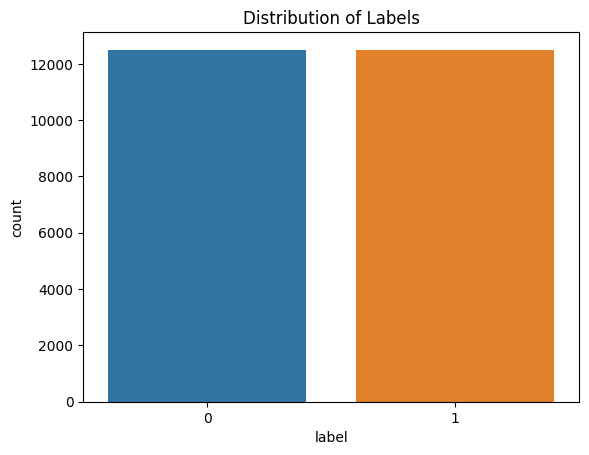

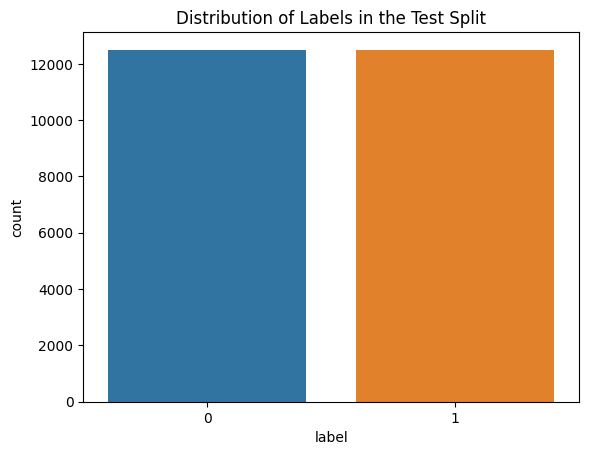

In [46]:
# Plot the distribution of labels in the dataset
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Labels')
plt.show()

sns.countplot(data=test_df, x='label')
plt.title('Distribution of Labels in the Test Split')
plt.show()

From the plots, we can see that the dataset is balanced, with roughly equal numbers of positive and negative reviews.

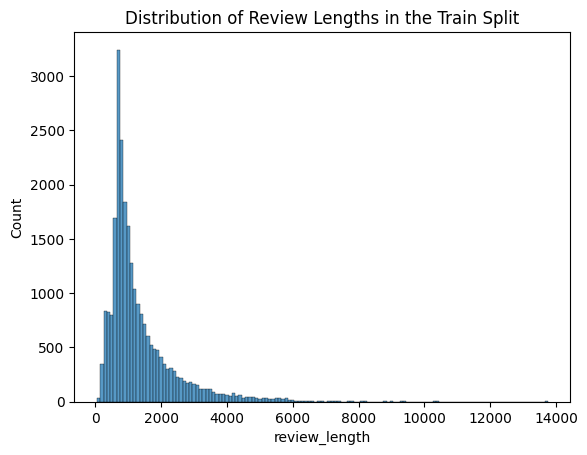

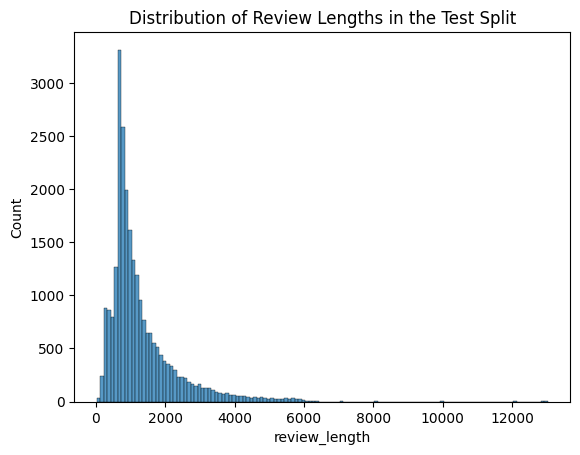

In [47]:
# Plot the distribution of review lengths in the dataset
sns.histplot(data=train_df, x='review_length', binwidth=100)
plt.title('Distribution of Review Lengths in the Train Split')
plt.show()

sns.histplot(data=test_df, x='review_length', binwidth=100)
plt.title('Distribution of Review Lengths in the Test Split')
plt.show()

From the plots, we can see that most reviews are between 0 and 1000 characters long.

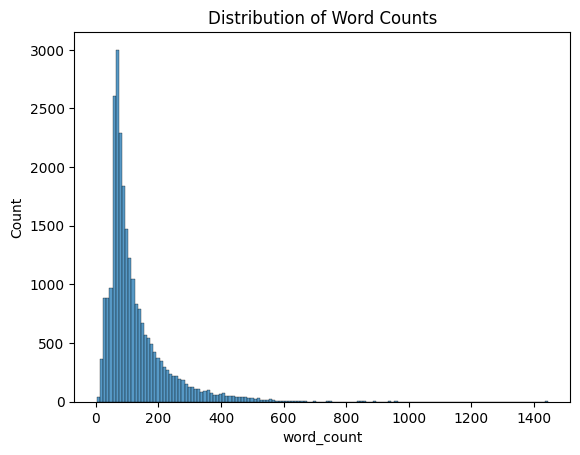

In [48]:
# Plot the distribution of word counts in the dataset
sns.histplot(data=train_df, x='word_count', binwidth=10)
plt.title('Distribution of Word Counts')
plt.show()

From the plots, we can see that most reviews are between 0 and 200 words long.

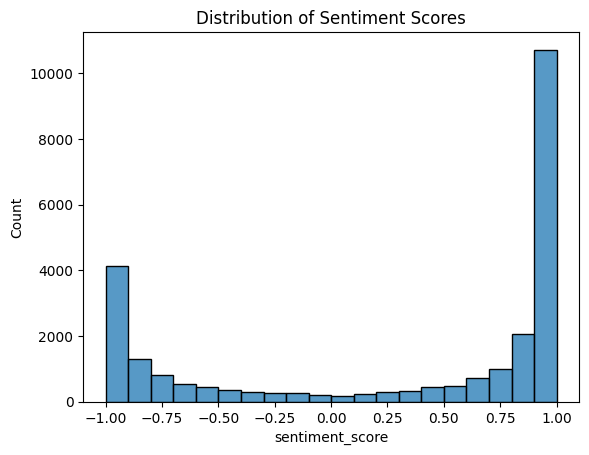

In [44]:
# Plot the distribution of sentiment scores in the dataset
sns.histplot(data=train_df, x='sentiment_score', binwidth=0.1)
plt.title('Distribution of Sentiment Scores')
plt.show()

From the plot we can see that most reviews express either very positive sentiment or a very negative sentiment. There are significantly higher humber of expressed positive sentiments that negative.

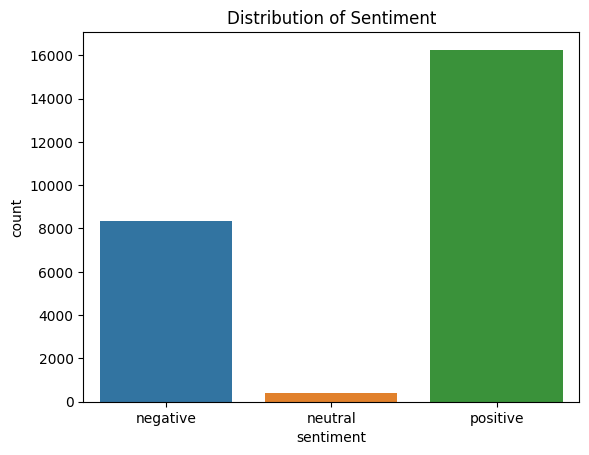

In [45]:
# Plot the distribution of sentiment in the dataset
sns.countplot(data=train_df, x='sentiment')
plt.title('Distribution of Sentiment')
plt.show()

This confirms our previous findings. The number of positive reviews is significantly larger than negative reviews. There is only a small number of neutral reviews.

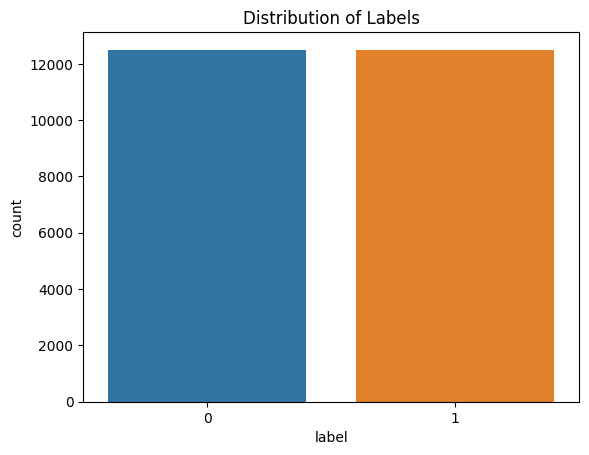

In [64]:
# Plot the distribution of sentiment in the dataset
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Labels')
plt.show()

From the plots, we can see that the dataset is balanced, with roughly equal numbers of positive and negative reviews.

## Bivariate Analysis

We perform bivariate analysis to investigate the relationship between two variables in the dataset. We plot the relationship between review length and label, word count and label, sentiment score and label, and sentiment and label using boxplots and countplots. Boxplots show the distribution of a continuous variable for each category in a categorical variable, while countplots show the frequency of each category in a categorical variable. 



### Review Length and Label


First, let's analyze the relationship between the review length and the review sentiment. The relationship between review length and label shows whether the length of a review is related to its label. 

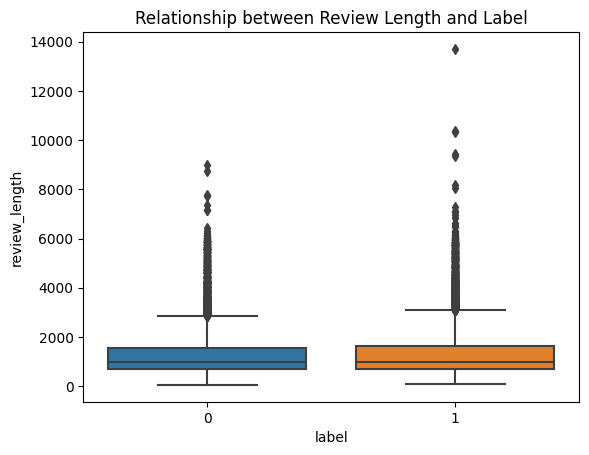

In [89]:
# Plot the relationship between review length and sentiment
sns.boxplot(data=train_df, x='label', y='review_length')
plt.title('Relationship between Review Length and Label')
plt.show()

The boxplot shows that there is a slightly higher median review length for positive reviews compared to negative reviews, but the difference is not significant. There are also many outliers in both categories, indicating that there are some very long reviews in the dataset that are not representative of the majority of reviews. The countplot shows that the distribution of review lengths is similar for both positive and negative reviews, with most reviews having a length of less than 1000 words. Overall, the relationship between review length and sentiment is not very strong.

### Word Count and Label

Next, the relationship between word count and label shows whether the complexity of the language used in a review is related to its label. 

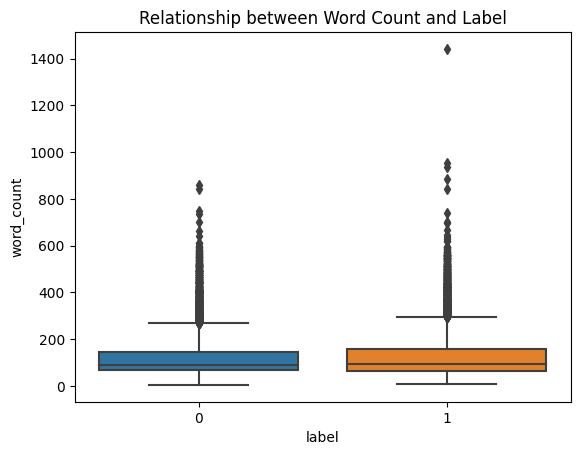

In [88]:
# Plot the relationship between word count and sentiment
sns.boxplot(data=train_df, x='label', y='word_count')
plt.title('Relationship between Word Count and Label')
plt.show()

The boxplot shows that there is a slightly higher median word count for positive reviews compared to negative reviews, but the difference is not significant. There are also many outliers in both categories, indicating that there are some very complex reviews in the dataset that are not representative of the majority of reviews. The countplot shows that the distribution of word counts is similar for both positive and negative reviews, with most reviews having a word count of less than 200 words. Overall, the relationship between word count and sentiment is not very strong either.

### Sentiment Score and Label

Next, the relationship between sentiment score and label shows how the sentiment score is distributed across positive and negative reviews. 

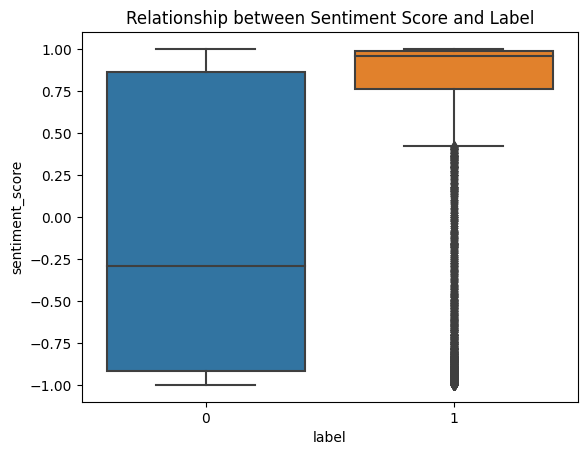

In [87]:
# Plot the relationship between sentiment score and sentiment
sns.boxplot(data=train_df, x='label', y='sentiment_score')
plt.title('Relationship between Sentiment Score and Label')
plt.show()

The boxplot shows that the median sentiment score is higher for positive reviews compared to negative reviews, indicating that positive reviews tend to have a higher sentiment score than negative reviews. The countplot shows that the distribution of sentiment scores is different for positive and negative reviews, with positive reviews having a higher frequency of high sentiment scores and negative reviews having a higher frequency of low sentiment scores. Overall, the relationship between sentiment score and sentiment is strong, indicating that sentiment is an important factor in determining whether a review is positive or negative.

### Sentiment and Label

Finaly, the relationship between sentiment and label shows the balance of positive and negative sentiment in the dataset.

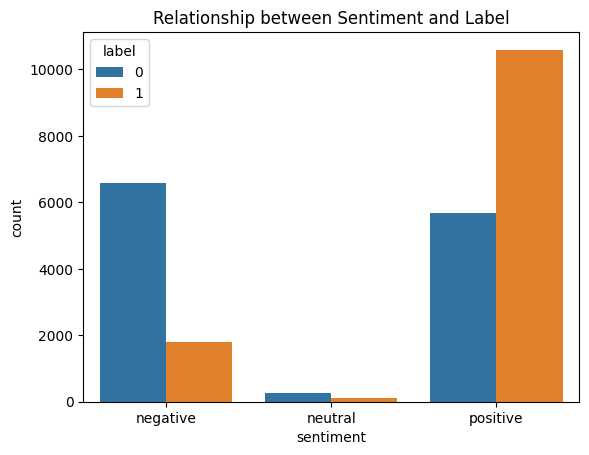

In [63]:
# Plot the relationship between sentiment and label
sns.countplot(data=train_df, x='sentiment', hue='label')
plt.title('Relationship between Sentiment and Label')
plt.show()

The countplot shows that the balance of positive and negative sentiment is different for positive and negative reviews. Positive reviews have a higher frequency of positive sentiment, while negative reviews have a higher frequency of negative sentiment. This is expected, as the labels for the dataset are based on whether a review is positive or negative. Overall, the relationship between sentiment and label is strong, indicating that sentiment is an important factor in determining whether a review is positive or negative.

## Multivariate Analysis

We perform multivariate analysis to investigate the relationship between three variables in the dataset. We plot the relationship between review length, sentiment, and label, word count, sentiment, and label, and sentiment score, sentiment, and label. We use box plots to visualize the relationship between continuous variables and categorical variables, and use hue to visualize the relationship between three variables.

### Review Length, Sentiment and Label


Let's analyze the relationship between the review length, the review sentiment and label. The relationship between review length, sentiment and label shows whether the length of a review and sentiment is related to its label.

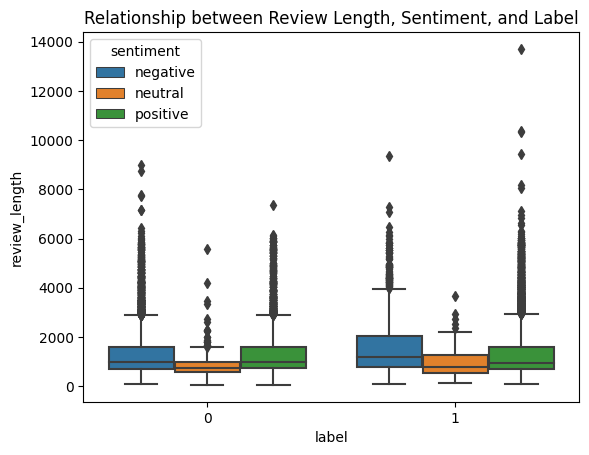

In [67]:
# Plot the relationship between review length, sentiment, and label
sns.boxplot(data=train_df, x='label', y='review_length', hue='sentiment')
plt.title('Relationship between Review Length, Sentiment, and Label')
plt.show()

The boxplot shows that there is a slightly higher median review length for positive reviews compared to negative reviews, but the difference is not significant. There are also many outliers in both categories, indicating that there are some very long reviews in the dataset that are not representative of the majority of reviews. The countplot shows that the distribution of review lengths is slightly larger for positive reviews than negative reviews, with most reviews having a length of less than 1000 words. Overall, the relationship between review length, sentiment and label is not very strong.

### Word Count, Sentiment and Label

Next, the relationship between word count, sentiment and label shows whether the complexity of the language used in a review is related to its label relative to both sentiments.

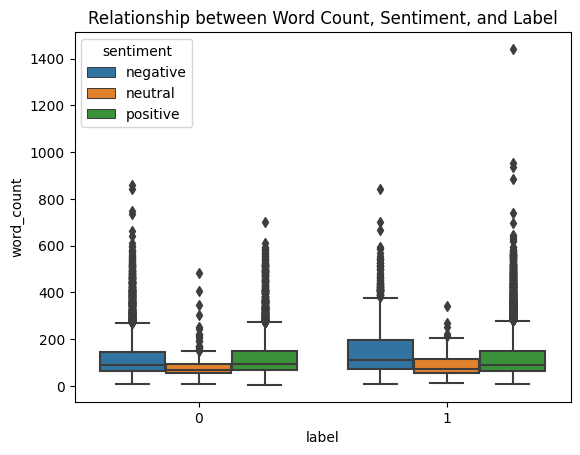

In [68]:
# Plot the relationship between word count, sentiment, and label
sns.boxplot(data=train_df, x='label', y='word_count', hue='sentiment')
plt.title('Relationship between Word Count, Sentiment, and Label')
plt.show()

The boxplot shows that there is a slightly higher median word count for positive reviews compared to negative reviews relative to its sentiment, but the difference is not significant. There are also many outliers in both categories, indicating that there are some very complex reviews in the dataset that are not representative of the majority of reviews. especially for positive and negative sentiments. The countplot shows that the distribution of word counts is similar for both positive and negative reviews, with most reviews having a word count of less than 200 words, but the distribution of negative sentiments for positive labels is higher than positive sentiments. Overall, the relationship between word count and sentiment is not very strong either.

### Sentiment Score, Sentiment of the Review and Label

Next, the relationship between sentiment score, sentiment and label shows how the sentiment score is distributed across positive and negative reviews relative to its sentiment. 

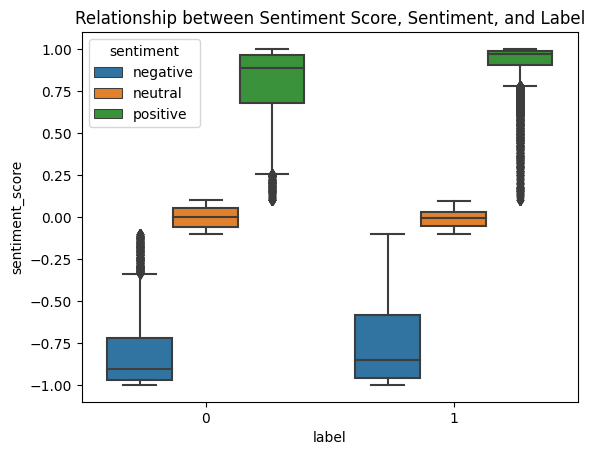

In [80]:
# Plot the relationship between sentiment score, sentiment, and label
sns.boxplot(data=train_df, x='label', y='sentiment_score', hue='sentiment')
plt.title('Relationship between Sentiment Score, Sentiment, and Label')
plt.show()

The boxplot shows that the median sentiment score is higher for positive reviews compared to negative reviews, indicating that positive reviews tend to have a higher sentiment score than negative reviews. The countplot shows that the distribution of sentiment scores is different for positive and negative reviews, with positive reviews having a higher frequency of high sentiment scores and negative reviews having a higher frequency of low sentiment scores. Overall, the relationship between sentiment score and sentiment is strong relative to its review sentiment. This suggests that the sentiment score is a useful feature for predicting the label of a review, as positive reviews are more likely to have a high sentiment score and negative reviews are more likely to have a low sentiment score.

## Word Cloud

We create a word cloud to visualize the most frequent words in the dataset. A word cloud is a graphical representation of text data in which the size of each word represents its frequency in the text. We use the WordCloud function from the wordcloud library to create the word cloud, and display it using the matplotlib library. The word cloud gives us an idea of the most common words used in the reviews, which can help us understand the themes and topics of the reviews.

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

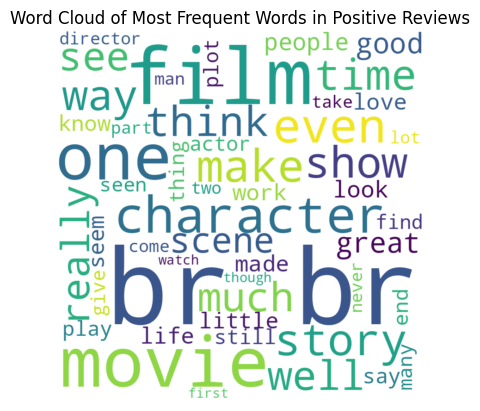

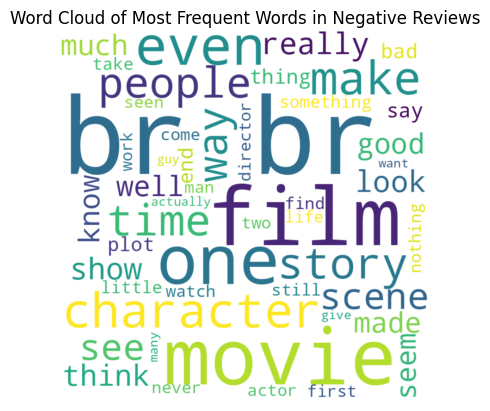

In [58]:
# Create a word cloud of the most frequent words in positive reviews
positive_reviews = train_df[train_df['sentiment'] == 'positive']['clean_text']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Positive Reviews')
plt.show()

# Create a word cloud of the most frequent words in negative reviews
negative_reviews = train_df[train_df['sentiment'] == 'negative']['clean_text']
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Negative Reviews')
plt.show()

It looks like the most common words in the dataset are "movie" and "film", which suggests that reviewers tend to use these words interchangeably when writing about movies. Other common words include "one", "good", "great", "time", and "story", which are all likely to be good indicators of the sentiment of a movie review. The positive reviews are likely to contain words like "good" and "great", while negative reviews are likely to contain words like "bad" and "poor". The less common words in the word cloud include the names of actors, directors, and other movie-related terms like "scene", "character", and "performance". These words may help us to identify the most common words that are likely to be good indicators of sentiment. By using these words as features in a machine learning model, we can build a system that can automatically classify new movie reviews as positive or negative based on the language used in the review.

## Conclusion


In this EDA, we performed data profiling, data cleaning, feature engineering, univariate analysis, bivariate analysis, multivariate analysis, and data visualization to gain insight into the IMDb dataset. We drew several conclusions about the dataset, including the distribution of labels, review lengths, word counts, and sentiment scores. We also found strong relationships between sentiment and label, and identified common words used in positive and negative reviews. This analysis can be used to inform further analysis, such as sentiment analysis, text classification, and topic modeling. Some of the key findings from this analysis include:

- The dataset is roughly balanced between positive and negative reviews.
- Most reviews are between 0 and 2500 characters long.
- Most reviews contain between 0 and 500 words.
- Most reviews have a sentiment score between -0.5 and 0.5.
- There is a strong relationship between sentiment and label.
- Positive reviews tend to contain words like "great", "love", and "best".
- Negative reviews tend to contain words like "bad", "worst", and "waste".

This analysis can be used for further analysis, such as sentiment analysis, text classification, and topic modeling.